# Функции одной переменной

В этом задании вы научитесь базовым навыкам работы с функциями одной переменной с помощью Python.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Формально, **график функции** $f(x)$ &mdash; множество всех точек $(x, y)$ таких, что $f(x) = y$.

Невозможно и не очень практично строить его целиком, потому что множество таких точек бесконечно, так что дальше под графиком мы будем понимать конечное его подмножество, достаточно хорошо приближающее настоящий график.

Для этого чаще всего выбирают какой-то самый интересный отрезок на оси $0x$ и разбивают его на равные маленькие промежутки:

In [3]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)  # массив из точек в отрезке [-2 pi, 2 pi] с шагом 0.01

Далее, для каждого $x$ в полученном множестве вычисляют $f(x)$. К счастью, в библиотеке numpy векторизованы основные операции, т.е. с массивами можно работать так, как будто они являются одним числом. Например, если мы хотим построить массив $y = \sin^2 x - \frac{1}{2}$, это достигается следующим образом: 

In [4]:
y = np.sin(x) ** 2 - 1/2

Наконец, хочется наглядно изобразить полученный график. В этом нам поможет пакет matplotlib.pyplot:

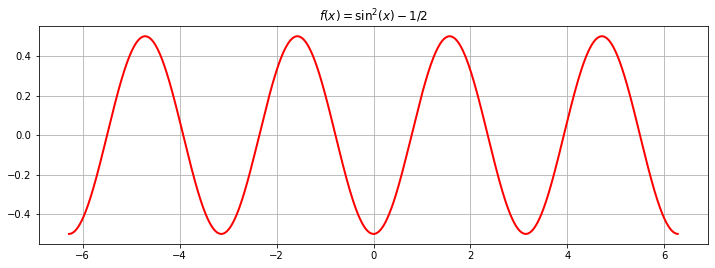

In [5]:
plt.figure(figsize=(12, 4))
plt.title('$f(x) = \sin^2(x) - 1/2$')
plt.plot(x, y, color='red', lw=2)
plt.grid(True)
plt.show()

Взглянув на этот график, мы можем сказать, чему примерно равны корни уравнения $f(x) = 0$, попадающие в наш отрезок, и их количество. Но что, если мы хотим находить решения более точно?

Давайте поймём, как можно описать куски графика, в которых находятся корни. Это область, в которой $|y|$ близок к нулю!

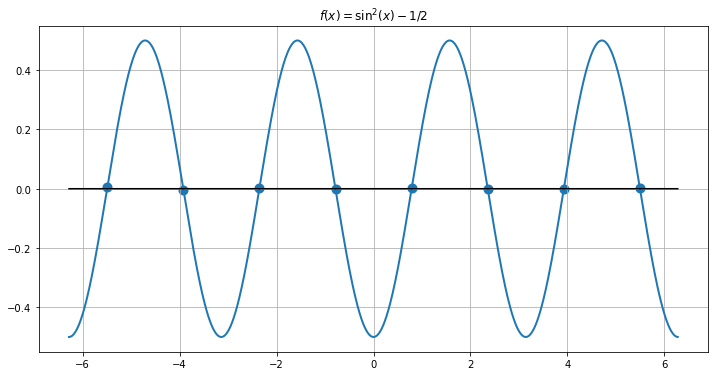

In [6]:
mask = np.abs(y) < 0.005  # Массив логических переменных. mask[i] == |y[i]| < 0.005

plt.figure(figsize=(12, 6))
plt.title('$f(x) = \sin^2(x) - 1/2$')
plt.plot(x, y, lw=2)
plt.plot(x, np.zeros_like(x), color='black')
plt.scatter(x[mask], y[mask], lw=4)  # С помощью массива нулей можно индексировать массивы numpy
plt.grid(True)
plt.show()

Sanity check: в массиве `x[mask]` должно быть 8 элементов.

In [7]:
len(x[mask])

8

Теперь давайте решим уравнение $3^x = x^{21}$. Из-за того, что функции быстро растущие, маленькие шаги в $x$ будут соответствовать большим шагам в $f(x) = 3^x - x^{21}$. Будет лучше, если мы прологарифмируем уравнение:

$$x \ln{3} = 21 \ln{x}.$$

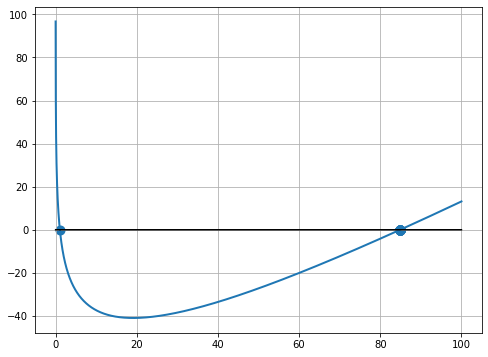

In [2]:
x = np.arange(0.01, 100, 0.001)
y = x * np.log(3) - 21 * np.log(x)

roots = np.abs(y) < 0.01

plt.figure(figsize=(8, 6))
plt.plot(x, y, lw=2)
plt.plot(x, np.zeros_like(x), color='black')
plt.scatter(x[roots], y[roots], lw=4)
plt.grid(True)
plt.show()

## Задачи

**Задача №1:** Постройте график и найдите по графику число решений уравнения $56x\sin\Bigl(\frac{5}{x}\Bigr)+25$ на полупрямой $x\in(0; +\infty)$.

Подсказка: с какого-то момента $C$ функция монотонно возрастает. Найдите его и рассмотрите график в отрезке $x \in [0; C + \varepsilon]$.

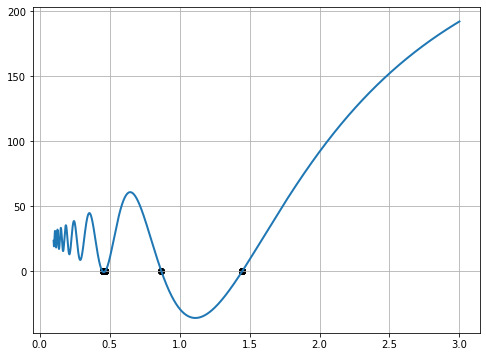

In [23]:
# Поместите ответ на задачу №1 в переменную N в этой клетке.
N = 4 # т.к. в первой точке два пересечения

# задаем уравнение функции
x = np.arange(0.1, 3, 0.0001)
y = (56*x) * np.sin(5/x) + 25

# определяем корни 
roots = np.abs(y) < 0.05

# строим график
plt.figure(figsize=(8, 6))
plt.plot(x, y, lw = 2)
plt.scatter (x[roots], y[roots], color = 'black')
plt.grid(True)
plt.show()


In [14]:
# проверка решения на корректность


**Задача №2:** Постройте график и найдите с помощью графика наибольший корень уравнения $x^5-3x+1=0$ с точностью до $0.01$.

Обратите внимание: подразумевается точность $x$, а не точность $f(x)$! Так что, скорее всего, `eps` в выражении `mask = np.abs(y) < eps` будет меньше $0.01$.

max_root: 1.21


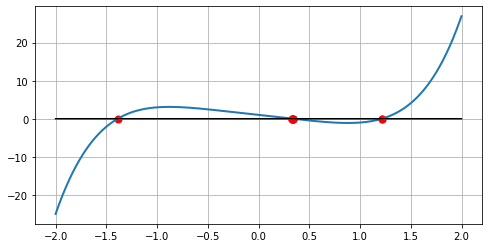

In [12]:
# Поместите ответ на задачу №2 в переменную max_root в эту клетку.

# задаем уровнение графика функции
x = np.arange(-2, 2, 0.001)
y = x**5 - 3*x + 1

# определяем корни уровнения  погрешностью < 0.01
roots = np.abs(y) < 0.01 

#ищем максимальный X (корень уравнения)
max_root = round(max(x[roots]), 2)
print("max_root:", max_root)

# строим график функции
plt.figure(figsize=(8, 4))
plt.plot(x, y, lw=2)
plt.scatter(x[roots], y[roots], lw=2, color='red') #накладываем на график точку с координатами roots (корни уравнения)
plt.plot(x, np.zeros_like(y), color='black')
plt.grid(True)
plt.show()


In [16]:
# проверка решения на корректность


**Задача №3:** Постройте график и найдите наибольший корень уравнения $2^x=x^{2021}$ с точностью до $0.01$.

Подсказка: искомый корень лежит в промежутке $[3\cdot10^4,~ 4\cdot10^4]$.

Координаты x [30063.86999999 30063.87999999 30063.88999999]
Координаты y [ 0.0047352  -0.00152403 -0.00778327]
30063.87


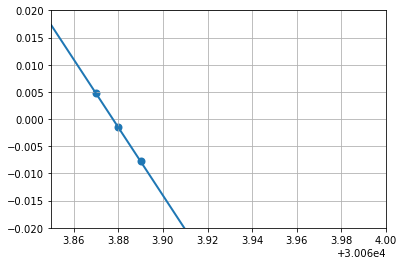

In [32]:
# Поместите ответ на задачу №3 в переменную max_root в эту клетку.

# задаем уравнение графика функции и ищем корни
x = np.arange(3*10**4, 3.01*10**4 , 0.01)
y = 2021 * np.log(x) - x * np.log(2)

roots = abs(y) < 0.01
x_root = x[roots]
y_roots = y[roots]
print("Координаты x", x[roots])
print("Координаты y", y[roots])

# определяем  наибольший корень уравнения
for index, i in enumerate(y_roots):
    if i >= 0:
        max_root = round(x_root[index], 2)
print(max_root)

# строим график
plt.plot(x, y, lw=2)
plt.xlim (30063.85, 30064) # задаем масштаб оси x
plt.ylim (-0.02, 0.02) # задаем масштаб оси y
plt.scatter(x[roots], y[roots], lw=2) #накладываем на график точку с координатами roots (корни уравнения)
plt.grid(True)

In [18]:
# проверка решения на корректность


**Задача №4** (бонусная): С помощью графика функции $f(x) = x^{15} + \tan{x} + 0.05 \cos{15 x}$ постройте график $f^{-1}$, функции, обратной к $f$, на промежутке $f^{-1}(x) \in [-0.5; 0.5]$.

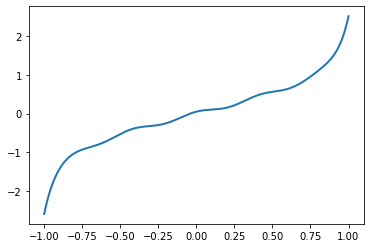

In [19]:
# зададим на каком-то промежутке функцию (интуитивно)
x = np.arange(-1,1, 10**(-5) )
y = x**15 + np.tan(x) + 0.05*np.cos(15*x)

plt.plot(x, y, lw=2)
plt.show()

[0.42292 0.42293] [0.49999011 0.50000168]
[-0.48519] [-0.50000569]


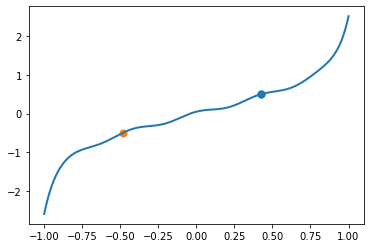

In [20]:
# видно, что на этом промежутке функция монотонна. Значит, нужно решить 2 подзадачи.
# 1) F(x) = f(x)-1/2 = 0 найти корень
# 2) F(x) = f(x)+1/2 = 0 найти корень

root1 = abs(y - 1/2) < 10**(-5)
root2 = abs(y + 1/2) < 10**(-5)

# это дает новый интервал для x переменной. Что позволить построить функцию в указанном в задаче интервале.
plt.plot(x, y, lw=2)
print(x[root1], y[root1])
print(x[root2], y[root2])
plt.scatter(x[root1], y[root1], lw=2)
plt.scatter(x[root2], y[root2], lw=2)
plt.show()

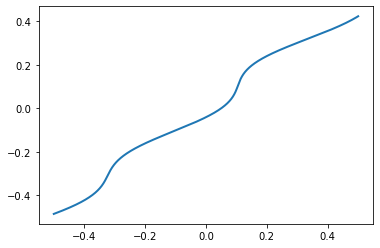

In [21]:
x = np.arange(sum(x[root2]) / len(x[root2]), sum(x[root1]) / len(x[root1]), 10**(-5)) 
y = x**15 + np.tan(x) + 0.05*np.cos(15*x) 

plt.plot(y, x, lw=2)
plt.show()